<a href="https://colab.research.google.com/github/Sheetal-ai/project/blob/master/linear_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
#importing important libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#loading the dataset to pandas dataframe
url = 'https://raw.githubusercontent.com/Afsaan/Linear-Regression-with-TensorFlow-2.x/master/graduate_admission.csv'
df = pd.read_csv(url)

#printing top 5 rows
df.head()

,index,gre,toefl,uni_rating,sop,lor,cgpa,research,admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       400 non-null    int64  
 1   gre         400 non-null    int64  
 2   toefl       400 non-null    int64  
 3   uni_rating  400 non-null    int64  
 4   sop         400 non-null    float64
 5   lor         400 non-null    float64
 6   cgpa        400 non-null    float64
 7   research    400 non-null    int64  
 8   admit       400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
df.shape

(400, 9)

In [ ]:
#target 
target = 'admit'

# Categorical Columns
# categorical_columns = ['research']
# df = pd.get_dummies(df,columns = categorical_columns)

In [ ]:
df

,index,gre,toefl,uni_rating,sop,lor,cgpa,research,admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
# Seperating data into Training and Validation Data
training_df = df.sample(frac=0.85, random_state=101)
validation_df = df.drop(training_df.index)


In [ ]:
print(f'[INFO] shape of training data {training_df.shape}')
print(f'[INFO] shape of validation data {validation_df.shape}')

[INFO] shape of training data (340, 9)
[INFO] shape of validation data (60, 9)


In [ ]:
training_df.head(10)

,index,gre,toefl,uni_rating,sop,lor,cgpa,research,admit
38,39,304,105,1,3.0,1.5,7.50,0,0.52
387,388,307,105,2,2.0,3.5,8.10,0,0.53
270,271,306,105,2,2.5,3.0,8.22,1,0.72
181,182,305,107,2,2.5,2.5,8.42,0,0.71
195,196,307,107,2,3.0,3.5,8.52,1,0.78
201,202,315,110,2,3.5,3.0,8.46,1,0.72
133,134,323,112,5,4.0,4.5,8.78,0,0.79
118,119,296,99,2,3.0,3.5,7.28,0,0.47
189,190,324,112,5,5.0,5.0,9.08,1,0.88
165,166,322,110,5,4.5,4.0,8.97,0,0.78


In [ ]:
# Removing labels from data and converting to numpy array
training_labels = training_df.pop(target).values
validation_labels = validation_df.pop(target).values
training_labels

array([0.52, 0.53, 0.72, 0.71, 0.78, 0.72, 0.79, 0.47, 0.88, 0.78, 0.76,
       0.75, 0.89, 0.97, 0.39, 0.75, 0.65, 0.7 , 0.51, 0.62, 0.58, 0.67,
       0.78, 0.64, 0.57, 0.74, 0.78, 0.74, 0.57, 0.79, 0.71, 0.59, 0.5 ,
       0.93, 0.6 , 0.57, 0.71, 0.58, 0.71, 0.77, 0.68, 0.87, 0.9 , 0.74,
       0.75, 0.96, 0.65, 0.77, 0.56, 0.72, 0.63, 0.93, 0.85, 0.54, 0.73,
       0.7 , 0.72, 0.56, 0.65, 0.38, 0.49, 0.74, 0.64, 0.38, 0.72, 0.64,
       0.76, 0.71, 0.45, 0.68, 0.53, 0.55, 0.82, 0.63, 0.54, 0.96, 0.62,
       0.9 , 0.62, 0.64, 0.65, 0.8 , 0.46, 0.91, 0.89, 0.73, 0.72, 0.73,
       0.8 , 0.7 , 0.72, 0.65, 0.78, 0.9 , 0.59, 0.65, 0.64, 0.76, 0.69,
       0.52, 0.48, 0.42, 0.68, 0.45, 0.67, 0.78, 0.47, 0.84, 0.93, 0.85,
       0.66, 0.7 , 0.64, 0.8 , 0.97, 0.71, 0.72, 0.73, 0.83, 0.73, 0.86,
       0.83, 0.84, 0.87, 0.49, 0.74, 0.9 , 0.91, 0.71, 0.84, 0.94, 0.7 ,
       0.9 , 0.64, 0.72, 0.47, 0.44, 0.57, 0.74, 0.71, 0.48, 0.82, 0.69,
       0.71, 0.89, 0.78, 0.82, 0.8 , 0.61, 0.76, 0.

In [ ]:
# basic stats of the training dataset
stats = training_df.describe().transpose()
print(stats)

            count        mean         std  ...      50%     75%     max
index       340.0  200.150000  114.640690  ...  199.500  297.25  400.00
gre         340.0  316.561765   11.390585  ...  316.500  325.00  340.00
toefl       340.0  107.247059    6.120050  ...  107.000  111.25  120.00
uni_rating  340.0    3.070588    1.134477  ...    3.000    4.00    5.00
sop         340.0    3.388235    1.017912  ...    3.500    4.00    5.00
lor         340.0    3.451471    0.897307  ...    3.500    4.00    5.00
cgpa        340.0    8.584794    0.605356  ...    8.565    9.08    9.92
research    340.0    0.523529    0.500182  ...    1.000    1.00    1.00
admit       340.0    0.722471    0.143358  ...    0.730    0.82    0.97

[9 rows x 8 columns]


In [ ]:
# scaling data w.r.t training_df
normalization_training_df = (training_df-stats['mean'])/stats['std']
normalization_validation_df = (validation_df-stats['mean'])/stats['std']

In [ ]:
# converting the data to numpy array
training_data = normalization_training_df.to_numpy()
validation_data = normalization_validation_df.to_numpy()

In [ ]:
# data type
print(f'[INFO] type of training data {type(training_data)}')
print(f'[INFO] type of validation data {type(validation_data)}')

[INFO] type of training data <class 'numpy.ndarray'>
[INFO] type of validation data <class 'numpy.ndarray'>


In [ ]:
# prepare tf.data.Dataset for training
def prepare_dataset(data , labels , batch, shuffle):
  dataset = tf.data.Dataset.from_tensor_slices((data , labels))
  dataset = dataset.shuffle(shuffle)
  dataset = dataset.batch(batch).prefetch(1)
  return dataset

In [ ]:
# preparing Dataset for training
batch_size = 32
buffer = 100
training_dataset = prepare_dataset(training_data, training_labels, batch_size, buffer)
validation_dataset = prepare_dataset(validation_data, validation_labels, batch_size, buffer)

In [ ]:
print(type(training_data))

<class 'numpy.ndarray'>


In [ ]:
import tensorflow as tf

In [ ]:
# creating the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6 , activation='relu'), #first hidden layer
        tf.keras.layers.Dense(3 , activation='sigmoid'),# second hiddeen layer
        tf.keras.layers.Dense(7 , activation='relu'),

        tf.keras.layers.Dense(1)
        ])

In [ ]:
# #creating the model
# model = tf.keras.Sequential([
#         tf.keras.layers.Dense(128 , activation='relu'),
#         tf.keras.layers.Dense(64 , activation='relu'),
#         tf.keras.layers.Dense(32 , activation='relu'),
#         tf.keras.layers.Dense(1)
#         ])

In [ ]:
# compiling the model
model.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [ ]:
history = model.fit(
    training_dataset,
    epochs=20,
    validation_data = validation_dataset
)

Epoch 1/20
11/11 [==============================] - 1s 25ms/step - loss: 0.5577 - mae: 0.7177 - val_loss: 0.2606 - val_mae: 0.4921
Epoch 2/20
11/11 [==============================] - 0s 6ms/step - loss: 0.1923 - mae: 0.4139 - val_loss: 0.0944 - val_mae: 0.2887
Epoch 3/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0722 - mae: 0.2462 - val_loss: 0.0354 - val_mae: 0.1678
Epoch 4/20
11/11 [==============================] - 0s 5ms/step - loss: 0.0285 - mae: 0.1487 - val_loss: 0.0152 - val_mae: 0.1037
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: 0.0133 - mae: 0.0961 - val_loss: 0.0085 - val_mae: 0.0750
Epoch 6/20
11/11 [==============================] - 0s 5ms/step - loss: 0.0087 - mae: 0.0756 - val_loss: 0.0066 - val_mae: 0.0648
Epoch 7/20
11/11 [==============================] - 0s 6ms/step - loss: 0.0071 - mae: 0.0660 - val_loss: 0.0059 - val_mae: 0.0615
Epoch 8/20
11/11 [==============================] - 0s 7ms/step - loss: 0.0060 - mae: 0.0

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 60        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 117
Trainable params: 117
Non-trainable params: 0
_________________________________________________________________


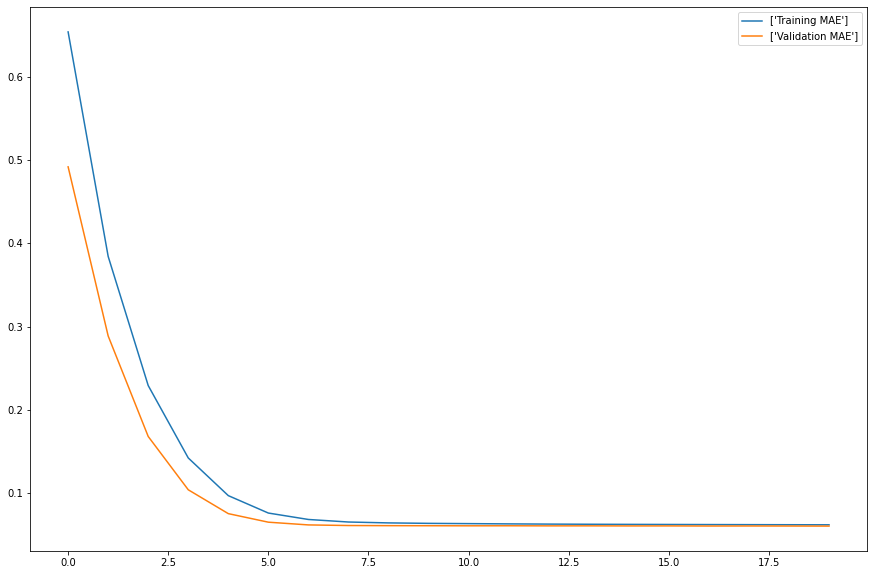

In [ ]:
# plotting Training and Validation Loss and MAE
mae = history.history['mae']
validation_mae = history.history['val_mae']
epochs = range(len(mae))

plt.figure(figsize=(15,10))
plt.plot(epochs, mae , label=['Training MAE'])
plt.plot(epochs, validation_mae , label=['Validation MAE'])
plt.legend()
plt.savefig('mae.jpg')
plt.show()

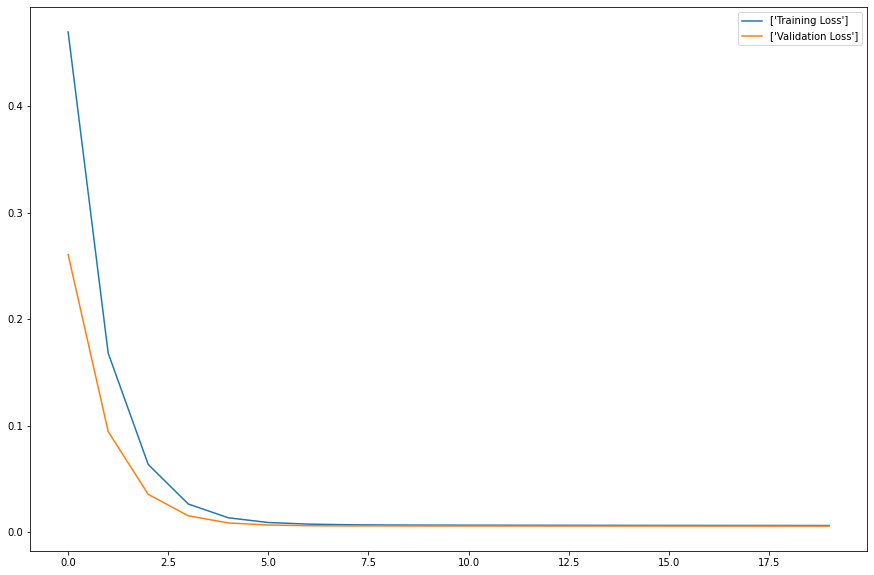

In [ ]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(len(mae))


plt.figure(figsize=(15,10))
plt.plot(epochs, loss , label=['Training Loss'])
plt.plot(epochs, validation_loss , label=['Validation Loss'])
plt.legend()
plt.savefig('loss.jpg')
plt.show()

In [ ]:
model.predict([test_Datatset])